In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [230]:
import string

#defining stop word and punctuation function

# Basic list of stop words. Consider expanding this list based on your needs.
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", 
    "at", "by", "for", "with", "about", "against", "between", "into", "through", 
    "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", 
    "once", "here", "there", "when", "where", "why", "how", "all", "any", 
    "both", "each", "few", "more", "most", "other", "some", "such", "no", 
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", 
    "can", "will", "just", "don", "should", "now", "and", "And", "1", "i'm", "im", "us", "–", "said", "also", "may", "would", "two", "however", "et", "al",
    "Є", "m", "e", "2", "j", "p", "h", "c", "0", "r", "n", "x", "3", "d", "f", "4", "b", "l", "–", "—", "o", "_", "Є", "є", "−", "∈"
])

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Function to remove stop words
def remove_stop_words(words):
    return [word for word in words if word not in stop_words]

In [232]:
filename = '50 academic papers.txt'
f = open(filename,encoding = "utf-8")
data = f.read()
datalower = data.lower()

In [234]:
# removing punctuation and stop words
text_no_punctuation = remove_punctuation(datalower)
words = text_no_punctuation.split()
words_no_stop_words = remove_stop_words(words)

In [236]:
words_count = Counter()
for word in words_no_stop_words:
    words_count.update({word,1})

In [238]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elvie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [240]:
from nltk.stem import WordNetLemmatizer

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatizing words
lemmatized_words = [lemmatizer.lemmatize(word) for word in words_no_stop_words]

In [241]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

# Example list of words
word_list = lemmatized_words

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elvie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [242]:
#creating word frequency count
words_count = Counter()
for word in word_list:
    words_count.update({word,1})

In [245]:
most_common_words = words_count.most_common(51)

In [248]:
x, y = zip(*most_common_words)

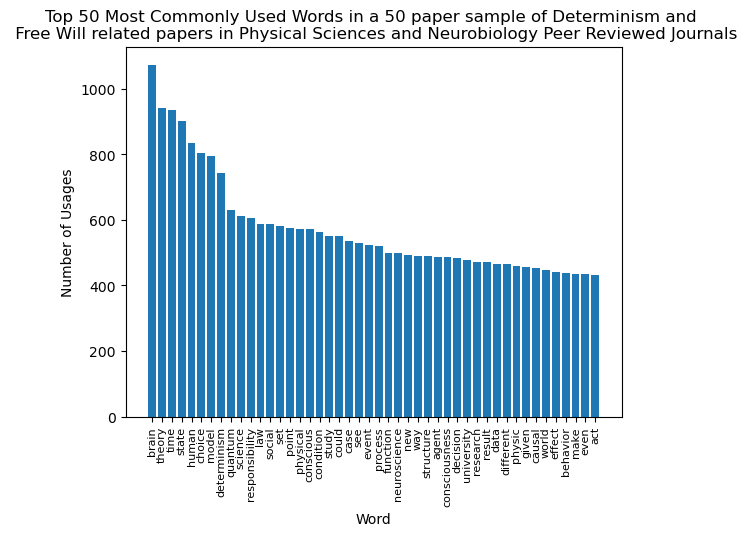

In [254]:
#Plotting from the 4th top words onwards, to remove the disproportionately over-represented words like 'organic'.
plt.bar(x[5:],y[5:])
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Word')
plt.ylabel('Number of Usages')
plt.title('Top 50 Most Commonly Used Words in a 50 paper sample of Determinism and \n Free Will related papers in Physical Sciences and Neurobiology Peer Reviewed Journals')
plt.show()